In [22]:
# import modules
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
# Load dataset
ames = pd.read_csv("/Users/mymacpro/Documents/PROJECTS/house-predict/data/train.csv")
ames.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## MSZoning
### Categories in dataset:  
       C	Commercial
       FV	Floating Village Residential  
       RH	Residential High Density  
       RL	Residential Low Density  
       RM	Residential Medium Density  
       
### Categories not in dataset (possiblely included in C(all)):  
       RP	Residential Low Density Park
       A	Agriculture
       I	Industrial


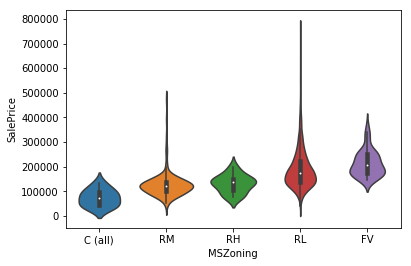

In [14]:
sns.violinplot(x="MSZoning", y="SalePrice",order=["C (all)","RM", "RH", "RL","FV"],data=ames)

In [7]:
ames.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [9]:
# c(all)???  does this include other categories? why price for commercial zone so low???

In [10]:
# ANOVA test
stats.f_oneway(ames.SalePrice[ames.MSZoning == "RL"],
              ames.SalePrice[ames.MSZoning == "RM"],
              ames.SalePrice[ames.MSZoning == "FV"],
              ames.SalePrice[ames.MSZoning == "RH"],
              ames.SalePrice[ames.MSZoning == "C (all)"])

F_onewayResult(statistic=43.84028167245718, pvalue=8.817633866272648e-35)

In [15]:
pvalue=8.817633866272648e-35

## Neighborhood  
       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker

In [16]:
ames.Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

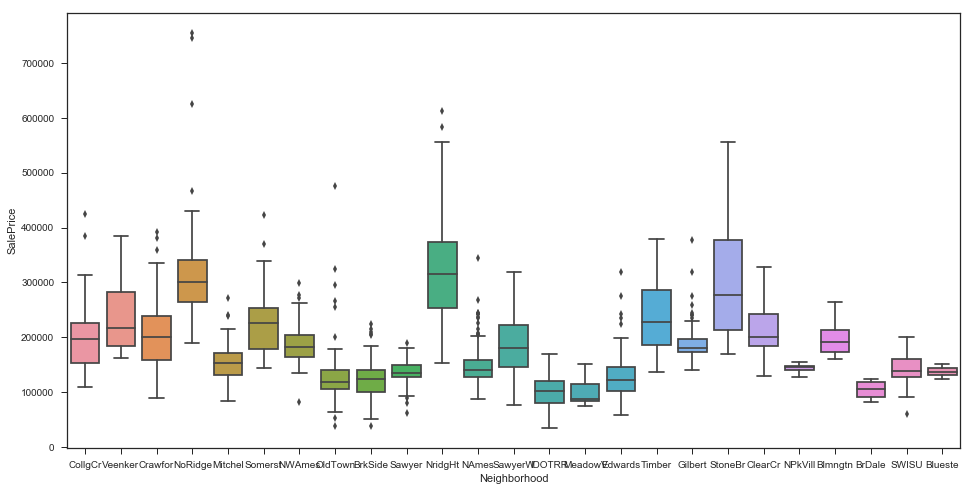

In [35]:
sns.set(style="ticks")
plt.figure(figsize=(16, 8))
sns.boxplot(x="Neighborhood", y="SalePrice", data=ames)

In [37]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
 
mod = ols('SalePrice ~ Neighborhood',
                data=ames).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

/Users/mymacpro/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                    sum_sq      df          F         PR(>F)
Neighborhood  5.023606e+12    24.0  71.784865  1.558600e-225
Residual      4.184305e+12  1435.0        NaN            NaN
